In [30]:
from pathlib import Path
import os
from visualisation.metric_extraction_tools import plot_all_experiments_in_folder
import matplotlib.pyplot as plt

os.environ["DEBUG"] = str(False)
content_root = Path(os.getcwd()).parent
checkpoints_dir = content_root / "checkpoints_translated"
# % load_ext autoreload
# % autoreload 2

In [31]:
#mn = metric_name#
mn_agg_acc = "accuracy"
#centralised
mn_c_acc = "accuracy"
mn_c_mcc = "MatthewsCorrelationCoefficient"
mn_c_macro_f1 = "macro_f1_score"
mn_c_micro_f1 = "micro_f1_score"

## Plot Tools

In [32]:
import itertools


def two_plots():
    return plt.subplots(1, 2, figsize=(12, 8))


def four_plots(figsize=(12, 6), xlabel_name="Global Epochs", ylabel_name="Accuracy"):
    fig, ax = plt.subplots(2, 2, figsize=figsize)
    fig, ax = fig, list(itertools.chain.from_iterable(ax))
    for axis in ax:
        axis.set_xlabel(xlabel_name, labelpad=20, fontdict={"size": 14})
    ax[0].set_ylabel(ylabel_name, labelpad=15, fontdict={"size": 18})
    ax[3].set_ylabel(ylabel_name, labelpad=15, fontdict={"size": 18})
    return fig, ax


def six_plots(figsize=(21, 12), metric_name="accuracy", xlabel_name="Global Epochs",
              ylabel_name="Accuracy"):
    fig, ax = plt.subplots(2, 3, figsize=figsize)
    fig.tight_layout()
    fig, axes = fig, list(itertools.chain.from_iterable(ax))
    axes[0].set_xlim(0, 500)
    axes[1].set_xlim(0, 500)
    axes[2].set_xlim(0, 500)
    for axis in axes[3:]:
        axis.set_xlabel(xlabel_name, labelpad=10, fontdict={"size": 14})
    axes[0].set_ylabel(ylabel_name, labelpad=20, fontdict={"size": 18})
    axes[3].set_ylabel(ylabel_name, labelpad=20, fontdict={"size": 18})

    if metric_name == "accuracy":
        for axis in axes:
            axis.set_ylim(0, 1.0)
    return fig, axes

## Datasets

In [33]:
cifar10_001 = "Cifar10_Lda_0.001"
cifar10_05 = "Cifar10_Lda_0.5"
cifar10_100 = "Cifar10_Lda_100.0"
celeba = "Celeba"
femnist = "Femnist"
shakespeare = "Shakespeare"

Fedavg Baselines

In [34]:
cifar10_001_fa = cifar10_001 + "_FedAvg"
cifar10_05_fa = cifar10_05 + "_FedAvg"
cifar10_100_fa = cifar10_100 + "_FedAvg"
cifar10_all_fa = "Cifar10_Lda_All_FedAvg"
celeba_fa = celeba + "_FedAvg"
femnist_fa = femnist + "_FedAvg"
shakespeare_fa = shakespeare + "_FedAvg"

In [35]:
from visualisation.metric_extraction_tools import EvaluationType
from matplotlib import colors as mcolors


def six_plots_with_baselines(metric_name="accuracy",
                             args={"alpha": 0.5, "color": mcolors.CSS4_COLORS["forestgreen"]},
                             xlabel_name="Global Epochs", ylabel_name="Accuracy"):
    fig, ax = six_plots(metric_name=metric_name, xlabel_name=xlabel_name, ylabel_name=ylabel_name)
    if metric_name == "accuracy":
        ax[0].set_ylim(0, 0.7)
        ax[1].set_ylim(0, 0.7)
        ax[2].set_ylim(0, 0.7)
        ax[3].set_ylim(0, 1.0)
        ax[4].set_ylim(0, 0.7)
        ax[5].set_ylim(0, 0.6)

    plot_all_experiments_in_folder(checkpoints_dir / cifar10_001_fa, ax=ax[0],
                                   metric_name=metric_name,
                                   title="Lda 0.001", format="-",
                                   gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                                   args=args)
    plot_all_experiments_in_folder(checkpoints_dir / cifar10_05_fa, metric_name=metric_name,
                                   ax=ax[1], title="Lda 0.5", format="-",
                                   gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                                   args=args)
    plot_all_experiments_in_folder(checkpoints_dir / cifar10_100_fa, metric_name=metric_name,
                                   ax=ax[2], title="Lda 100.0", format="-",
                                   gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                                   args=args)
    plot_all_experiments_in_folder(checkpoints_dir / celeba_fa, metric_name=metric_name,
                                   ax=ax[3], title="Celeba",
                                   gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                                   args=args)
    plot_all_experiments_in_folder(checkpoints_dir / femnist_fa, metric_name=metric_name,
                                   ax=ax[4], title="Femnist",
                                   gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                                   args=args)
    plot_all_experiments_in_folder(checkpoints_dir / shakespeare_fa, evaluation_type=EvaluationType
                                   .AGGREGATED, multiplicator_centralised=2,
                                   metric_name=metric_name,
                                   ax=ax[5], title="Shakespeare",
                                   gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                                   args=args)
    return fig, ax


def cifar_plots_with_baselines(metric_name="accuracy",
                               args={"alpha": 0.5, "color": mcolors.CSS4_COLORS["forestgreen"]},
                               xlabel_name="Global Epochs", ylabel_name="Accuracy"):
    fig, ax = plt.subplots(1, 3, figsize=(21, 7.5))

    for axis in ax:
        axis.set_xlabel(xlabel_name, labelpad=10, fontdict={"size": 14})
    ax[0].set_ylabel(ylabel_name, labelpad=20, fontdict={"size": 18})

    if metric_name == "accuracy":
        ax[0].set_ylim(0, 0.7)
        ax[1].set_ylim(0, 0.7)
        ax[2].set_ylim(0, 0.7)
        ax[3].set_ylim(0, 1.0)
        ax[4].set_ylim(0, 0.7)
        ax[5].set_ylim(0, 0.6)

    plot_all_experiments_in_folder(checkpoints_dir / cifar10_001_fa, ax=ax[0],
                                   metric_name=metric_name,
                                   title="Lda 0.001", format="-",
                                   gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                                   args=args)
    plot_all_experiments_in_folder(checkpoints_dir / cifar10_05_fa, metric_name=metric_name,
                                   ax=ax[1], title="Lda 0.5", format="-",
                                   gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                                   args=args)
    plot_all_experiments_in_folder(checkpoints_dir / cifar10_100_fa, metric_name=metric_name,
                                   ax=ax[2], title="Lda 100.0", format="-",
                                   gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                                   args=args)
    return fig, ax

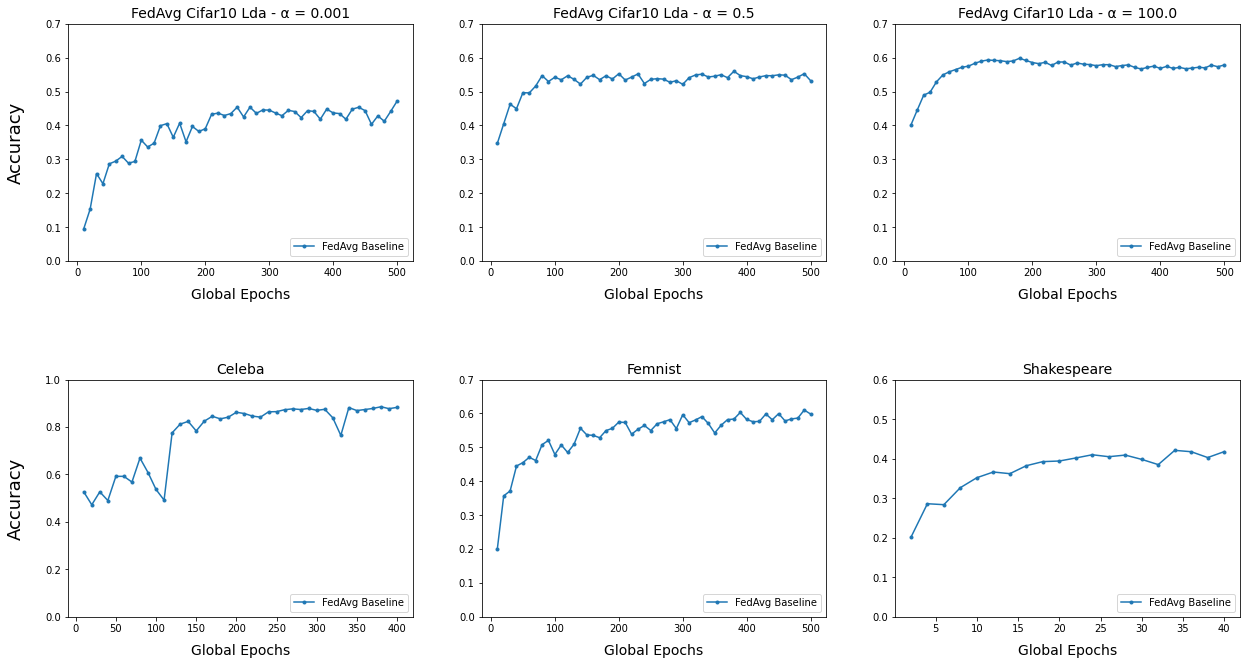

In [36]:
from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(21, 12), constrained_layout=True)
gs = GridSpec(2, 1, figure=fig)

gs0 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0])
cf0 = fig.add_subplot(gs0[0, 0])
cf1 = fig.add_subplot(gs0[0, 1])
cf2 = fig.add_subplot(gs0[0, 2])

# gs2 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0])
# cf3 = fig.add_subplot(gs2[0, 1])

gs1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1])
cel = fig.add_subplot(gs1[0, 0])
fem = fig.add_subplot(gs1[0, 1])
sha = fig.add_subplot(gs1[0, 2])

cf0.set_ylim(0, 0.7)
cf1.set_ylim(0, 0.7)
cf2.set_ylim(0, 0.7)
cel.set_ylim(0, 1.0)
fem.set_ylim(0, 0.7)
sha.set_ylim(0, 0.6)

args = {}  # {"color": mcolors.CSS4_COLORS["aqua"]}
metric_name = "accuracy"
formatter = ".-"
plot_all_experiments_in_folder(checkpoints_dir / cifar10_001_fa, ax=cf0,
                               metric_name=metric_name,
                               title="FedAvg Cifar10 Lda - α = 0.001", format=formatter,
                               gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                               args=args)
plot_all_experiments_in_folder(checkpoints_dir / cifar10_05_fa, metric_name=metric_name,
                               ax=cf1, title="FedAvg Cifar10 Lda - α = 0.5", format=formatter,
                               gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                               args=args)
plot_all_experiments_in_folder(checkpoints_dir / cifar10_100_fa, metric_name=metric_name,
                               ax=cf2, title="FedAvg Cifar10 Lda - α = 100.0", format=formatter,
                               gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                               args=args)
plot_all_experiments_in_folder(checkpoints_dir / celeba_fa, metric_name=metric_name,
                               ax=cel, title="Celeba", format=formatter,
                               gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                               args=args)
plot_all_experiments_in_folder(checkpoints_dir / femnist_fa, metric_name=metric_name,
                               ax=fem, title="Femnist", format=formatter,
                               gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                               args=args)
plot_all_experiments_in_folder(checkpoints_dir / shakespeare_fa, evaluation_type=EvaluationType
                               .CENTRALISED, multiplicator_centralised=2,
                               metric_name=metric_name, format=formatter,
                               ax=sha, title="Shakespeare",
                               gen_name_from_subfolder_name=lambda x: "FedAvg Baseline",
                               args=args)

for axis in fig.get_axes():
    axis.set_xlabel("Global Epochs", labelpad=10, fontdict={"size": 14})
cf0.set_ylabel("Accuracy", labelpad=20, fontdict={"size": 18})
cel.set_ylabel("Accuracy", labelpad=20, fontdict={"size": 18})
# fig.suptitle("FedAvg Baseline Experiments")
fig.savefig(bbox_inches="tight", fname="fedavg_baselines.png")

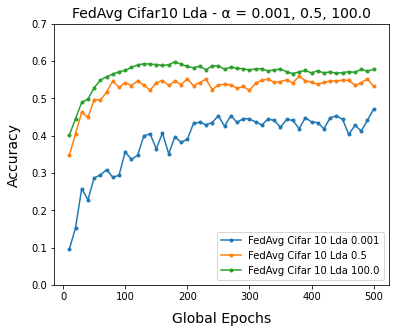

In [37]:
from visualisation.metric_extraction_tools import get_default_plot

fig, ax = get_default_plot()
ax.set_ylim(0, 0.7)
formatter = ".-"
plot_all_experiments_in_folder(checkpoints_dir / cifar10_all_fa, metric_name=metric_name,
                               ax=ax, title="FedAvg Cifar10 Lda - α = 0.001, 0.5, 100.0",
                               format=formatter,
                               gen_name_from_subfolder_name=lambda
                                   x: f"FedAvg Cifar 10 Lda {x.split('_')[-1]}",
                               args={})
ax.set_xlabel("Global Epochs", labelpad=10, fontdict={"size": 14})
ax.set_ylabel("Accuracy", labelpad=10, fontdict={"size": 14})

fig.savefig(bbox_inches="tight", fname="cifar10_comparisons_experiment.png")

## Systematic Parameters

## Cohort Size

In [38]:
cifar10_001_vcs = cifar10_001 + "_Varying_Cohort_Size"
cifar10_05_vcs = cifar10_05 + "_Varying_Cohort_Size"
cifar10_100_vcs = cifar10_100 + "_Varying_Cohort_Size"
celeba_vcs = celeba + "_Varying_Cohort_Size"
femnist_vcs = femnist + "_Varying_Cohort_Size"
shakespeare_vcs = shakespeare + "_Varying_Cohort_Size_4"

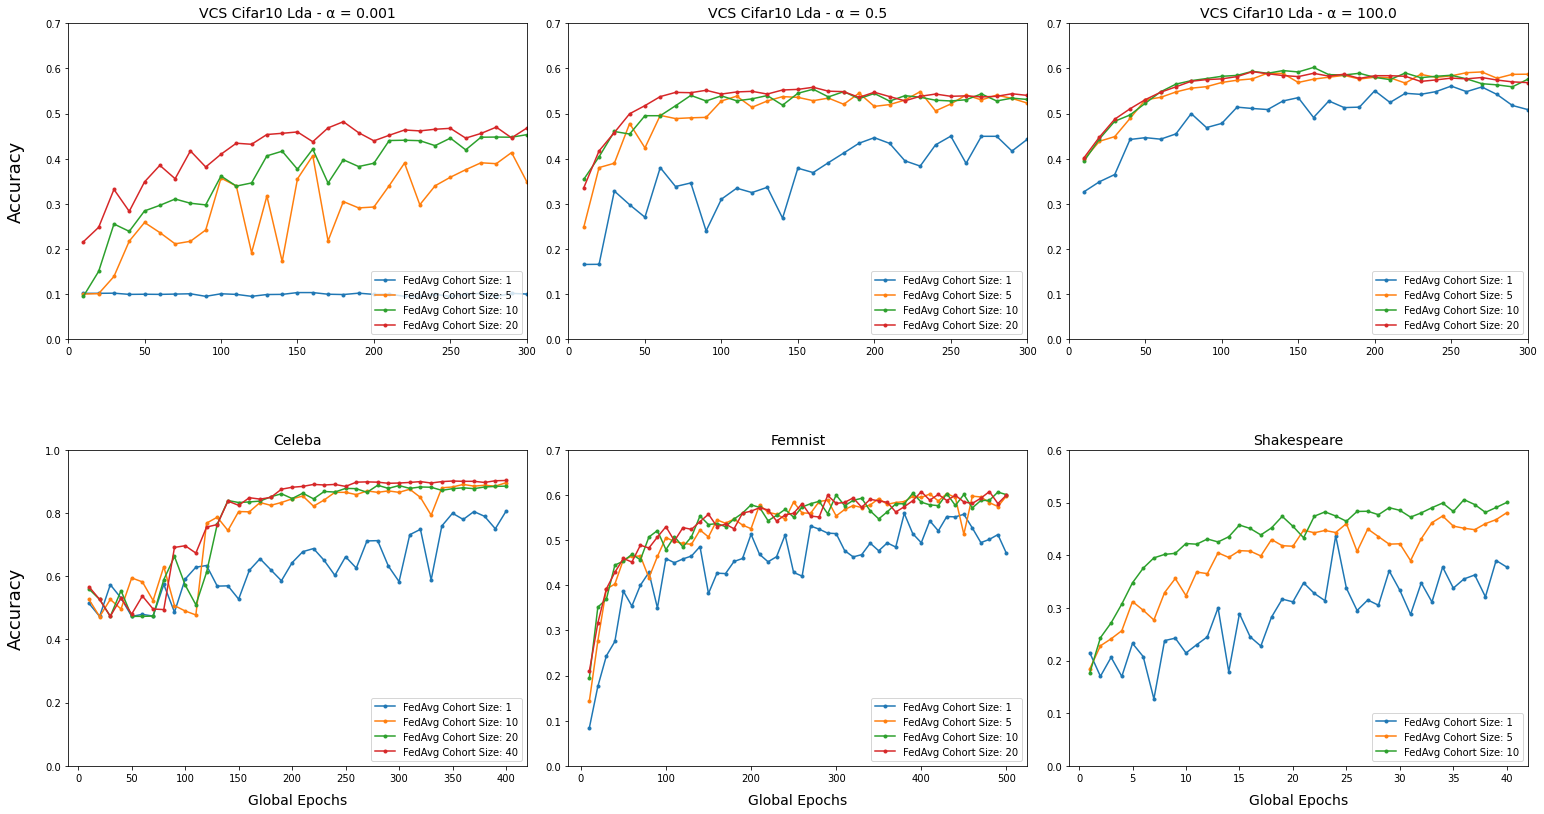

In [39]:
from visualisation.metric_extraction_tools import EvaluationType

fig, ax = six_plots()
ax[0].set_ylim(0, 0.7)
ax[0].set_xlim(0, 300)
ax[1].set_ylim(0, 0.7)
ax[1].set_xlim(0, 300)
ax[2].set_ylim(0, 0.7)
ax[2].set_xlim(0, 300)
ax[3].set_ylim(0, 1.0)
ax[4].set_ylim(0, 0.7)
ax[5].set_ylim(0, 0.6)

formatter = ".-"
name_generator = lambda x: "FedAvg Cohort Size: " + x.split("_")[-1]

plot_all_experiments_in_folder(checkpoints_dir / cifar10_001_vcs, ax=ax[0],
                               gen_name_from_subfolder_name=name_generator,
                               title="VCS Cifar10 Lda - α = 0.001", format=formatter)
plot_all_experiments_in_folder(checkpoints_dir / cifar10_05_vcs,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[1], title="VCS Cifar10 Lda - α = 0.5", format=formatter)
plot_all_experiments_in_folder(checkpoints_dir / cifar10_100_vcs,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[2], title="VCS Cifar10 Lda - α = 100.0", format=formatter)
plot_all_experiments_in_folder(checkpoints_dir / celeba_vcs, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[3], title="Celeba")
plot_all_experiments_in_folder(checkpoints_dir / femnist_vcs, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[4], title="Femnist")
plot_all_experiments_in_folder(checkpoints_dir / shakespeare_vcs,
                               multiplicator_centralised=2, evaluation_type=EvaluationType
                               .AGGREGATED,
                               gen_name_from_subfolder_name=name_generator, format=formatter,
                               ax=ax[5], title="Shakespeare")
# fig.suptitle("Varying Cohort Size")

fig.savefig(bbox_inches="tight", fname="vcs_experiment.png")


Local Epochs

In [40]:
name = "_VLE_Final"
checkpoints_dir = checkpoints_dir.parent / "checkpoints_translated"
cifar10_001_vle = cifar10_001 + name  #"_Varying_Local_Epochs"
cifar10_05_vle = cifar10_05 + name  #"_Varying_Local_Epochs"
cifar10_100_vle = cifar10_100 + name  # "_Varying_Local_Epochs_Rerun"
celeba_vle = celeba + "_Varying_Local_Epochs"
femnist_vle = femnist + "_Varying_Local_Epochs"
shakespeare_vle = shakespeare + "_Varying_Local_Epochs"

C:\Users\Markus\AppData\Local\Temp\ipykernel_21532\214662020.py:41: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axis.legend(labels, handles=handles, loc="lower right")


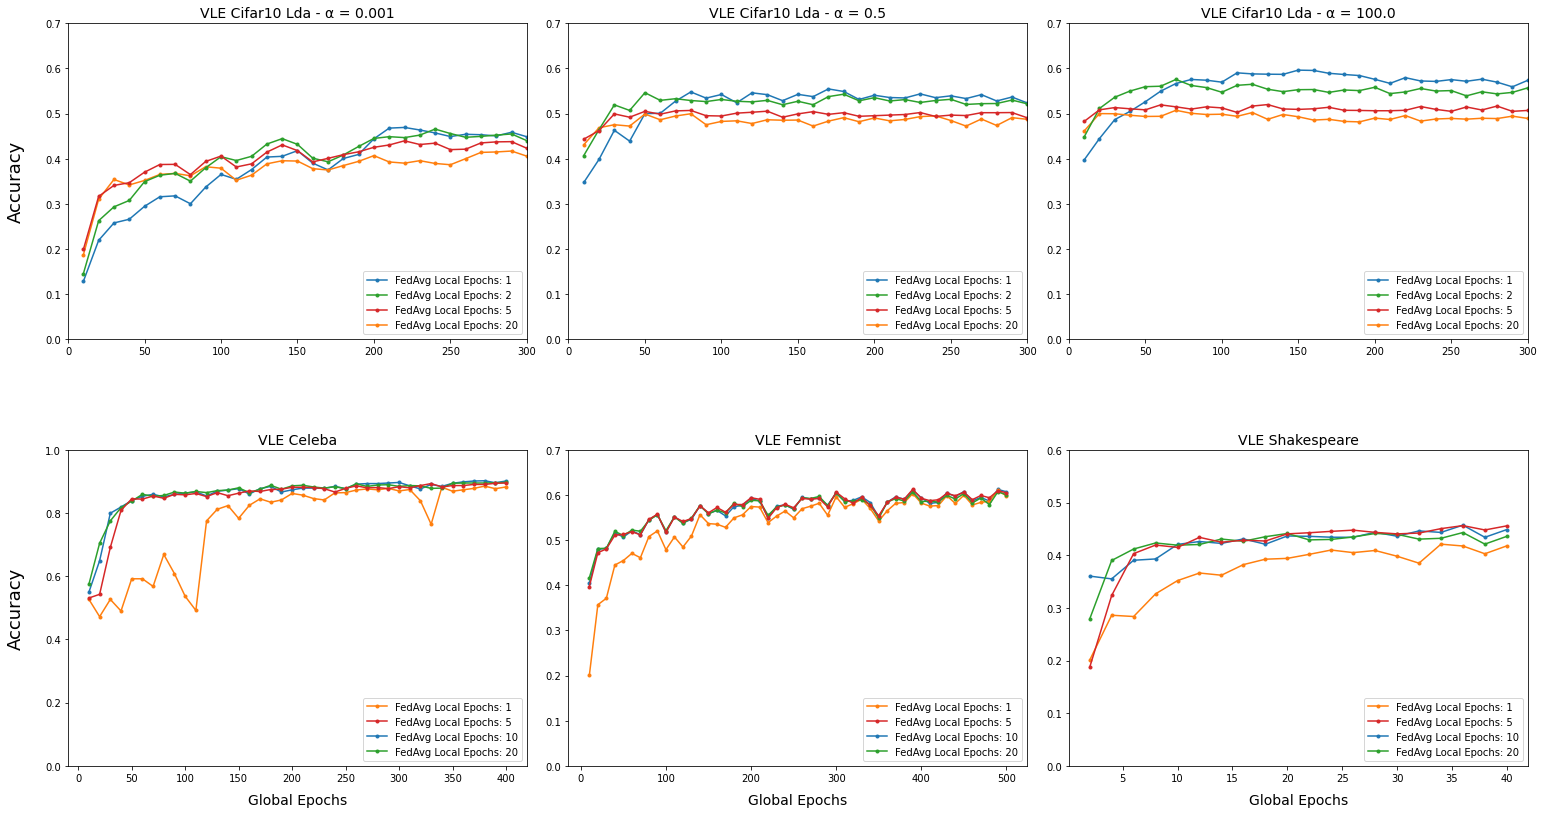

In [41]:
fig, ax = six_plots()

ax[0].set_ylim(0, 0.7)
ax[0].set_xlim(0, 300)
ax[1].set_ylim(0, 0.7)
ax[1].set_xlim(0, 300)
ax[2].set_ylim(0, 0.7)
ax[2].set_xlim(0, 300)
ax[3].set_ylim(0, 1.0)
ax[4].set_ylim(0, 0.7)
ax[5].set_ylim(0, 0.6)

formatter = ".-"
name_generator = lambda x: "FedAvg Local Epochs: " + x.split("_")[-1]

plot_all_experiments_in_folder(checkpoints_dir / cifar10_001_vle, ax=ax[0], format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               title="VLE Cifar10 Lda - α = 0.001", win=2)

plot_all_experiments_in_folder(checkpoints_dir / cifar10_05_vle, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[1], title="VLE Cifar10 Lda - α = 0.5")
plot_all_experiments_in_folder(checkpoints_dir / cifar10_100_vle, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[2], title="VLE Cifar10 Lda - α = 100.0")
plot_all_experiments_in_folder(checkpoints_dir / celeba_vle, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[3], title="VLE Celeba")
plot_all_experiments_in_folder(checkpoints_dir / femnist_vle, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[4], title="VLE Femnist")
plot_all_experiments_in_folder(checkpoints_dir / shakespeare_vle, multiplicator_centralised=2,
                               gen_name_from_subfolder_name=name_generator, format=formatter,
                               ax=ax[5], title="VLE Shakespeare")
# fig.suptitle("Varying Local Epochs")

for axis in ax:
    handles, labels = axis.get_legend_handles_labels()
    handles_labels = sorted(zip(handles, labels), key=lambda s: int(s[1].split(" ")[-1]))
    handles, labels = zip(*handles_labels)
    axis.legend(labels, handles=handles, loc="lower right")

fig.savefig(bbox_inches="tight", fname="vle_experiment.png")

FedProx

In [42]:
cifar10_001_fp = cifar10_001 + "_FedProx"
cifar10_05_fp = cifar10_05 + "_FedProx"
cifar10_100_fp = cifar10_100 + "_FedProx"
celeba_fp = celeba + "_FedProx"
femnist_fp = femnist + "_FedProx"
shakespeare_fp = shakespeare + "_FedProx"

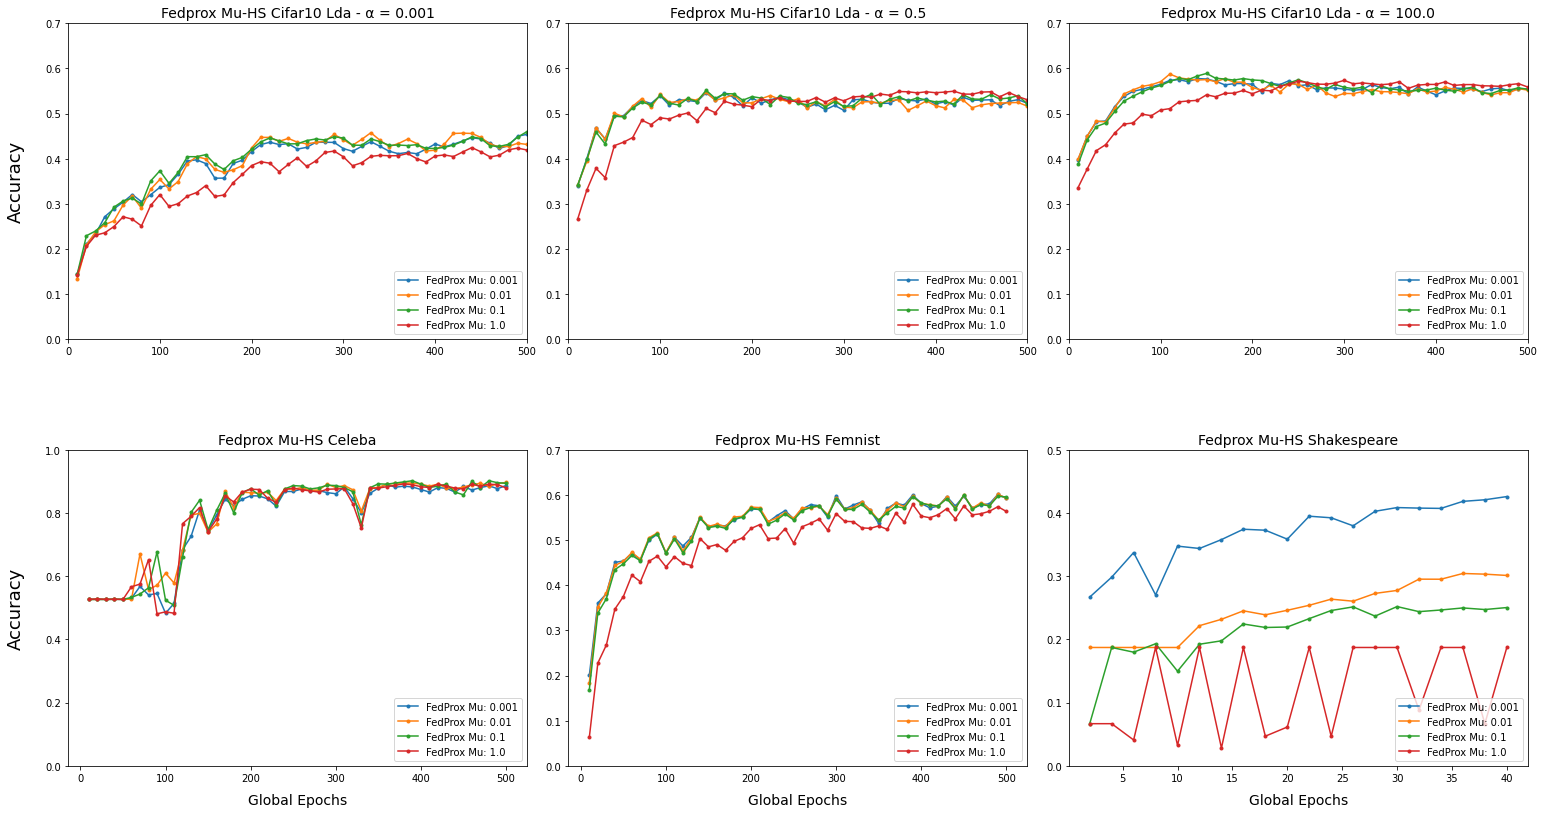

In [43]:
fig, ax = six_plots()

ax[0].set_ylim(0, 0.7)  #0.1
ax[0].set_xlim(0, 500)
ax[1].set_ylim(0, 0.7)  #1.0
ax[1].set_xlim(0, 500)
ax[2].set_ylim(0, 0.7)  #0.1
ax[2].set_xlim(0, 500)
ax[3].set_ylim(0, 1.0)  #0.1
ax[4].set_ylim(0, 0.7)  #0.01
ax[5].set_ylim(0, 0.5)

formatter = ".-"
name_generator = lambda x: "FedProx Mu: " + x.split("_")[-1]

plot_all_experiments_in_folder(checkpoints_dir / cifar10_001_fp, ax=ax[0], format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               title="Fedprox Mu-HS Cifar10 Lda - α = 0.001", win=2)
plot_all_experiments_in_folder(checkpoints_dir / cifar10_05_fp, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[1], title="Fedprox Mu-HS Cifar10 Lda - α = 0.5")
plot_all_experiments_in_folder(checkpoints_dir / cifar10_100_fp, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[2], title="Fedprox Mu-HS Cifar10 Lda - α = 100.0")
plot_all_experiments_in_folder(checkpoints_dir / celeba_fp, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[3], title="Fedprox Mu-HS Celeba")
plot_all_experiments_in_folder(checkpoints_dir / femnist_fp, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[4], title="Fedprox Mu-HS Femnist")
plot_all_experiments_in_folder(checkpoints_dir / shakespeare_fp, multiplicator_centralised=2,
                               gen_name_from_subfolder_name=name_generator, format=formatter,
                               ax=ax[5], title="Fedprox Mu-HS Shakespeare")
# fig.suptitle("Mu Hyperparameter Search")
fig.savefig(bbox_inches="tight", fname="fedprox_hs.png")

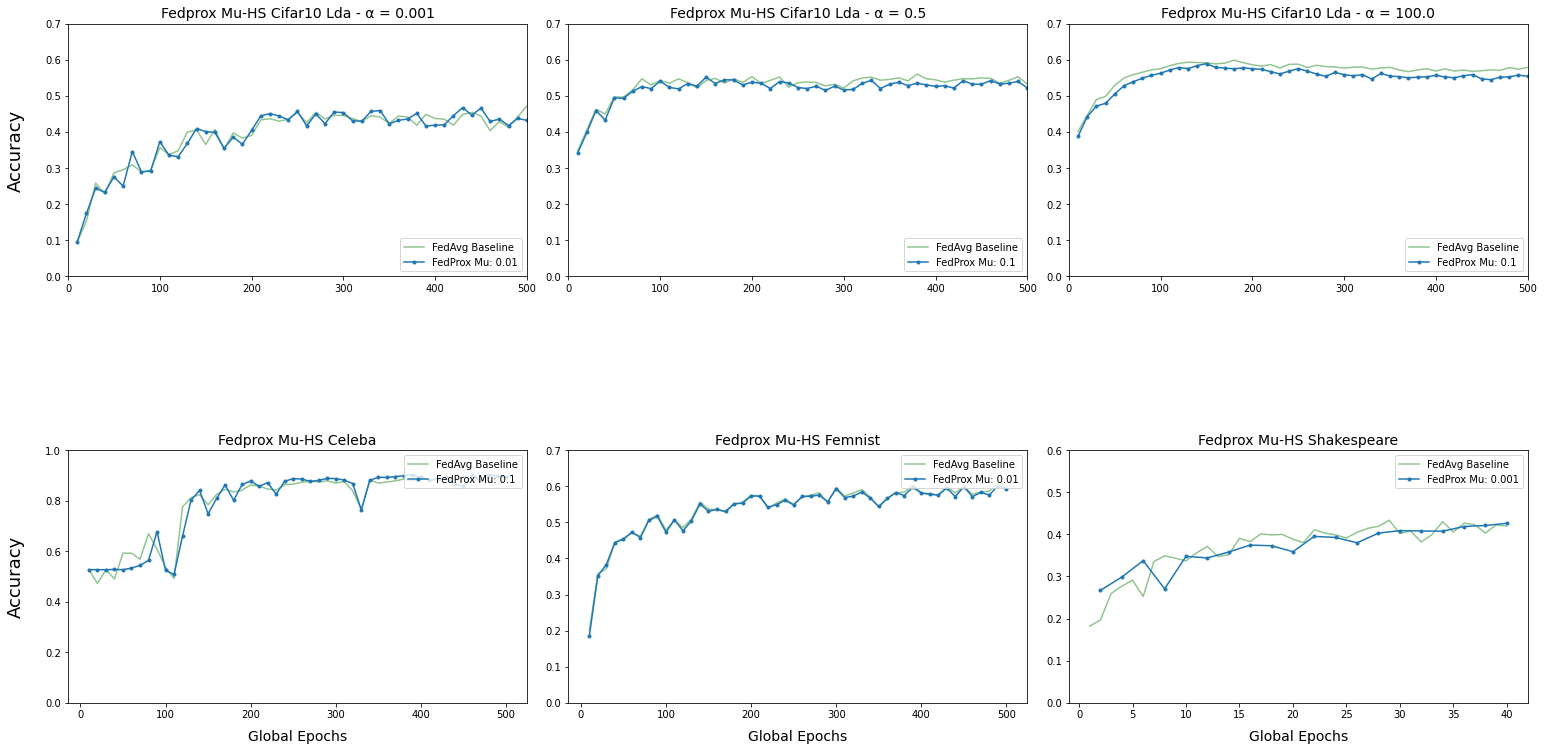

In [44]:
fig, ax = six_plots_with_baselines(metric_name="accuracy")

metric_name = "accuracy"

bc_001 = 0.01
bc_05 = 0.1
bc_100 = 0.1
bcel = 0.1
bfem = 0.01
bsh = 0.001

exclude_all_but_best = lambda b: lambda n: n.split("_")[-1] != str(b)
name_generator = lambda x: "FedProx Mu: " + x.split("_")[-1]

plot_all_experiments_in_folder(checkpoints_dir / cifar10_001_fp, ax=ax[0], format=formatter,
                               gen_name_from_subfolder_name=name_generator, metric_name=metric_name,
                               exclude_from_run_predicate_fun_by_name=exclude_all_but_best(bc_001),
                               title="Fedprox Mu-HS Cifar10 Lda - α = 0.001")
plot_all_experiments_in_folder(checkpoints_dir / cifar10_05_fp, format=formatter,
                               gen_name_from_subfolder_name=name_generator, metric_name=metric_name,
                               exclude_from_run_predicate_fun_by_name=exclude_all_but_best(bc_05),
                               ax=ax[1], title="Fedprox Mu-HS Cifar10 Lda - α = 0.5")
plot_all_experiments_in_folder(checkpoints_dir / cifar10_100_fp, format=formatter,
                               gen_name_from_subfolder_name=name_generator, metric_name=metric_name,
                               exclude_from_run_predicate_fun_by_name=exclude_all_but_best(bc_100),
                               ax=ax[2], title="Fedprox Mu-HS Cifar10 Lda - α = 100.0")
plot_all_experiments_in_folder(checkpoints_dir / celeba_fp, format=formatter,
                               gen_name_from_subfolder_name=name_generator, metric_name=metric_name,
                               exclude_from_run_predicate_fun_by_name=exclude_all_but_best(bcel),
                               ax=ax[3], title="Fedprox Mu-HS Celeba", legend_pos="upper right")
plot_all_experiments_in_folder(checkpoints_dir / femnist_fp, format=formatter,
                               gen_name_from_subfolder_name=name_generator, metric_name=metric_name,
                               exclude_from_run_predicate_fun_by_name=exclude_all_but_best(bfem),
                               ax=ax[4], title="Fedprox Mu-HS Femnist", legend_pos="upper right")
plot_all_experiments_in_folder(checkpoints_dir / shakespeare_fp, multiplicator_centralised=2,
                               exclude_from_run_predicate_fun_by_name=exclude_all_but_best(bsh),
                               gen_name_from_subfolder_name=name_generator, format=formatter,
                               metric_name=metric_name,
                               ax=ax[5], title="Fedprox Mu-HS Shakespeare",
                               legend_pos="upper right")
# fig.suptitle("Mu Hyperparameter Search")
fig.savefig(bbox_inches="tight", fname="fedprox_fedavg_comparison.png")


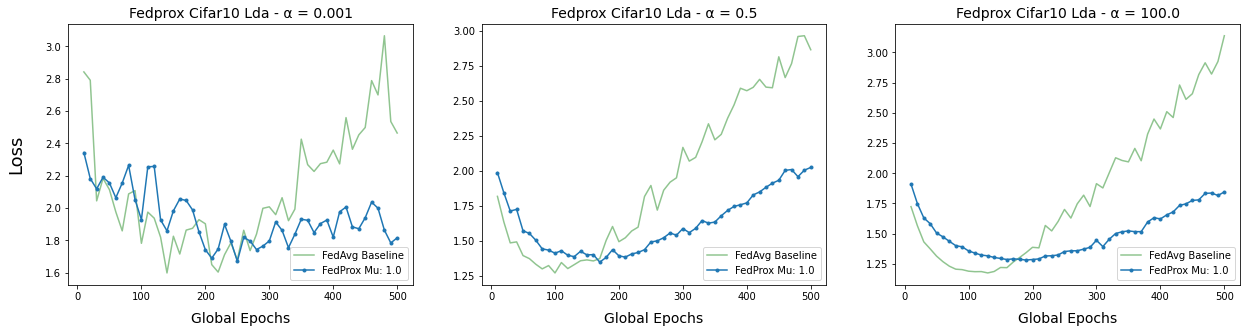

In [45]:
fig, ax = cifar_plots_with_baselines(metric_name="loss", ylabel_name="Loss")

metric_name = "loss"
exclude_all_but_mu1 = lambda n: n.split("_")[-1] != "1.0"
name_generator = lambda x: "FedProx Mu: " + x.split("_")[-1]

plot_all_experiments_in_folder(checkpoints_dir / cifar10_001_fp, ax=ax[0],
                               title="Fedprox Cifar10 Lda - α = 0.001", metric_name=metric_name,
                               format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               exclude_from_run_predicate_fun_by_name=exclude_all_but_mu1, win=2
                               )
plot_all_experiments_in_folder(checkpoints_dir / cifar10_05_fp,
                               exclude_from_run_predicate_fun_by_name=exclude_all_but_mu1,
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[1], title="Fedprox Cifar10 Lda - α = 0.5")
plot_all_experiments_in_folder(checkpoints_dir / cifar10_100_fp, format=formatter,
                               exclude_from_run_predicate_fun_by_name=exclude_all_but_mu1,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[2], metric_name=metric_name,
                               title="Fedprox Cifar10 Lda - α = 100.0")

# fig.suptitle("Impact of Fedprox with high Mu on Loss")
fig.savefig(bbox_inches="tight", fname="fedprox_loss_experiment.png")

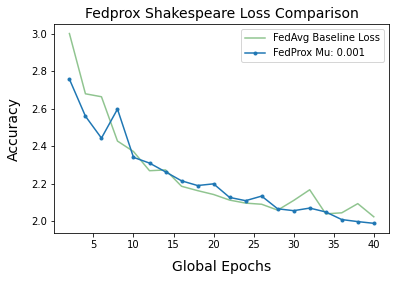

In [46]:
fig, ax = get_default_plot()

metric_name = "loss"
exclude_all_but_mu1 = lambda n: n.split("_")[-1] != "0.001"
name_generator = lambda x: "FedProx Mu: " + x.split("_")[-1]

plot_all_experiments_in_folder(checkpoints_dir / shakespeare_fa, ax=ax,
                               multiplicator_centralised=2,
                               metric_name=metric_name,
                               title="FedAvg Baseline Loss", format="-",
                               gen_name_from_subfolder_name=lambda x: "FedAvg Baseline Loss",
                               args={"alpha": 0.5, "color": mcolors.CSS4_COLORS["forestgreen"]})

plot_all_experiments_in_folder(checkpoints_dir / shakespeare_fp, ax=ax,
                               multiplicator_centralised=2,
                               title="Fedprox Shakespeare Loss Comparison", metric_name=metric_name,
                               format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               exclude_from_run_predicate_fun_by_name=exclude_all_but_mu1,
                               legend_pos="upper right"
                               )
ax.set_xlabel("Global Epochs", labelpad=10, fontdict={"size": 14})
ax.set_ylabel("Accuracy", labelpad=10, fontdict={"size": 14})
# fig.suptitle("Impact of Fedprox with high Mu on Loss")
fig.savefig(bbox_inches="tight", fname="fedprox_loss_shakespeare.png")

Shared Global Datasets

In [47]:
cifar10_001_sgd = cifar10_001 + "_Shared_Global_Dataset" + "_No_Pretraining"
cifar10_05_sgd = cifar10_05 + "_Shared_Global_Dataset" + "_No_Pretraining"
cifar10_100_sgd = cifar10_100 + "_Shared_Global_Dataset" + "_No_Pretraining"
celeba_sgd = celeba + "_Shared_Global_Dataset" + "_No_Pretraining"
femnist_sgd = femnist + "_Shared_Global_Dataset" + "_No_Pretraining"
shakespeare_sgd = shakespeare + "_Shared_Global_Dataset" + "_No_Pretraining"

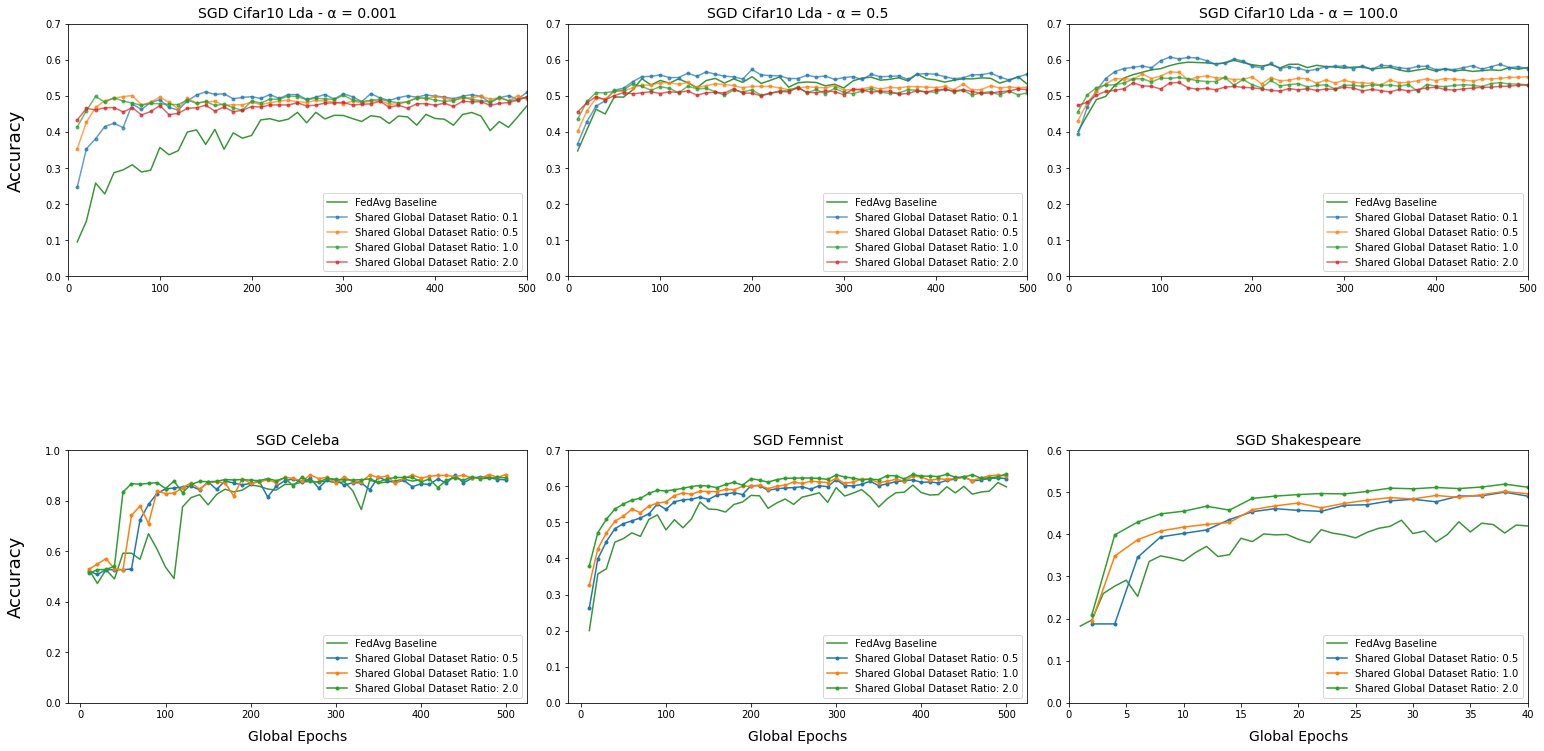

In [48]:
fig, ax = six_plots_with_baselines(args={"alpha": 0.9, "color": mcolors.CSS4_COLORS["forestgreen"]})

metric_name = "accuracy"
formatter = ".-"
name_generator = lambda x: "Shared Global Dataset Ratio: " + x.split("_")[-1]

plot_all_experiments_in_folder(checkpoints_dir / cifar10_001_sgd, ax=ax[0],
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               args={"alpha": 0.7},
                               title="SGD Cifar10 Lda - α = 0.001")
plot_all_experiments_in_folder(checkpoints_dir / cifar10_05_sgd,
                               metric_name=metric_name, format=formatter,
                               args={"alpha": 0.7},
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[1], title="SGD Cifar10 Lda - α = 0.5")
plot_all_experiments_in_folder(checkpoints_dir / cifar10_100_sgd,
                               metric_name=metric_name, format=formatter,
                               args={"alpha": 0.7},
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[2], title="SGD Cifar10 Lda - α = 100.0")
plot_all_experiments_in_folder(checkpoints_dir / celeba_sgd,
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[3], title="SGD Celeba")
plot_all_experiments_in_folder(checkpoints_dir / femnist_sgd,
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[4], title="SGD Femnist")
plot_all_experiments_in_folder(checkpoints_dir / shakespeare_sgd, 2,
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[5], title="SGD Shakespeare")
# fig.suptitle("Shared Global Dataset")
ax[5].set_xlim(0, 40)
fig.savefig(bbox_inches="tight", fname="sgd_experiment.png")

Varying Optimisers

In [49]:
cifar10_001_vo = cifar10_001 + "_Varying_Optimisers"
cifar10_05_vo = cifar10_05 + "_Varying_Optimisers"
cifar10_100_vo = cifar10_100 + "_Varying_Optimisers"
celeba_vo = celeba + "_Varying_Optimisers"
femnist_vo = femnist + "_Varying_Optimisers"
shakespeare_vo = shakespeare + "_Varying_Optimisers_2"

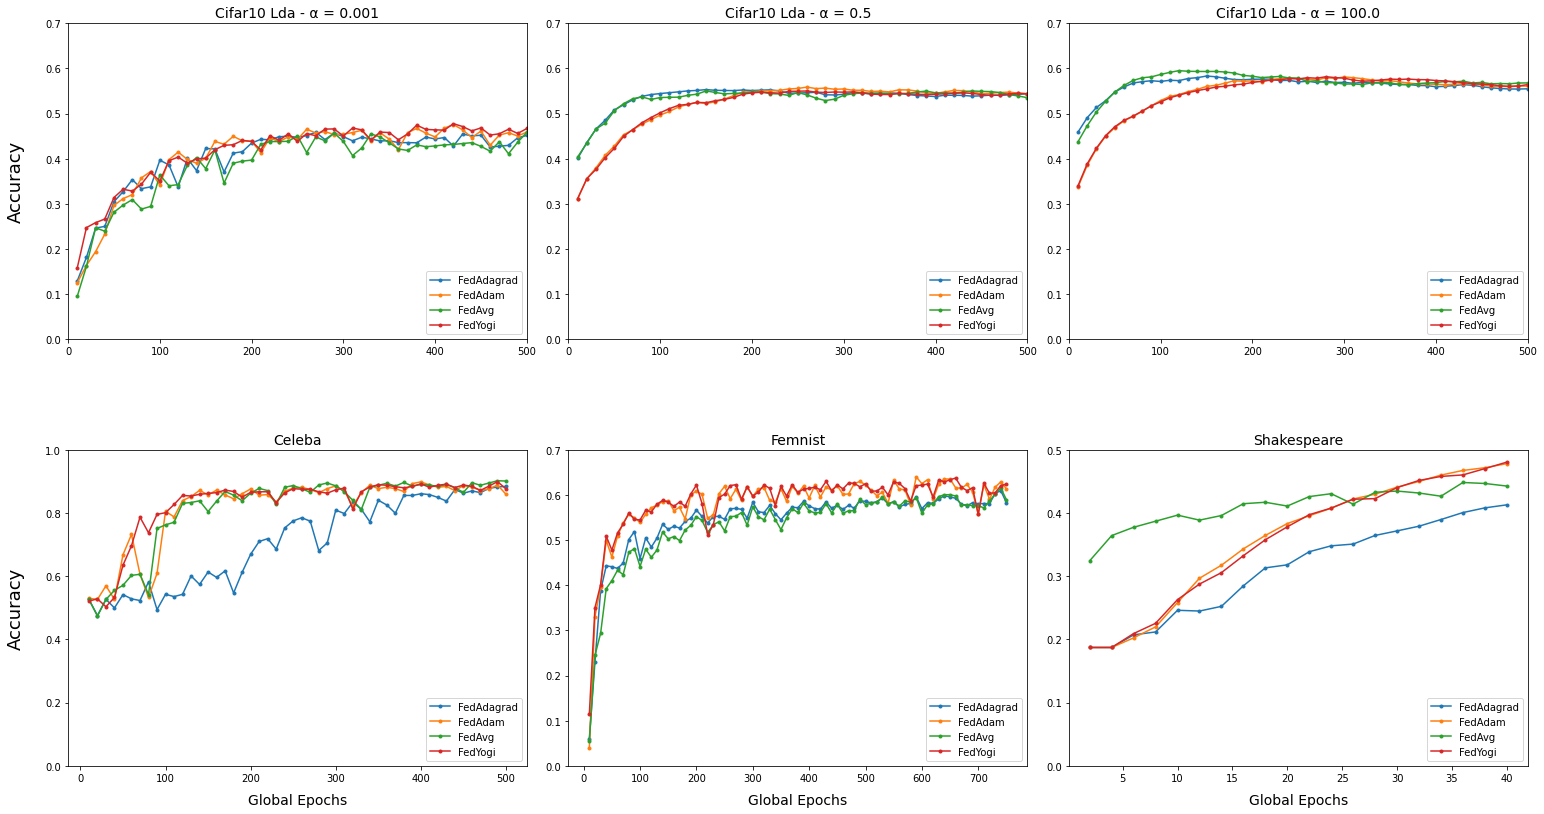

In [50]:
fig, ax = six_plots()

name_dict = {
    "fedavg": "FedAvg",
    "fedadagrad": "FedAdagrad",
    "fedadam": "FedAdam",
    "fedyogi": "FedYogi"
}
metric_name = "accuracy"
formatter = ".-"
name_generator = lambda n: name_dict[n.split("_")[-1]]

ax[0].set_ylim(0, 0.7)  #0.1
ax[0].set_xlim(0, 500)
ax[1].set_ylim(0, 0.7)  #1.0
ax[1].set_xlim(0, 500)
ax[2].set_ylim(0, 0.7)  #0.1
ax[2].set_xlim(0, 500)
ax[3].set_ylim(0, 1.0)  #0.1
ax[4].set_ylim(0, 0.7)  #0.01
ax[5].set_ylim(0, 0.5)

plot_all_experiments_in_folder(checkpoints_dir / cifar10_001_vo,
                               ax=ax[0],
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               title="Cifar10 Lda - α = 0.001")
plot_all_experiments_in_folder(checkpoints_dir / cifar10_05_vo,
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[1], title="Cifar10 Lda - α = 0.5", win=3)
plot_all_experiments_in_folder(checkpoints_dir / cifar10_100_vo,
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[2], title="Cifar10 Lda - α = 100.0", win=3)
plot_all_experiments_in_folder(checkpoints_dir / celeba_vo,
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[3], title="Celeba")
plot_all_experiments_in_folder(checkpoints_dir / femnist_vo,
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[4], title="Femnist")
plot_all_experiments_in_folder(checkpoints_dir / shakespeare_vo, 2,
                               metric_name=metric_name, format=formatter,
                               gen_name_from_subfolder_name=name_generator,
                               ax=ax[5], title="Shakespeare")
# fig.suptitle("Adaptive Optimisers")
fig.savefig(bbox_inches="tight", fname="adaptive_optimisers_experiment.png")

Group vs Batch Norm

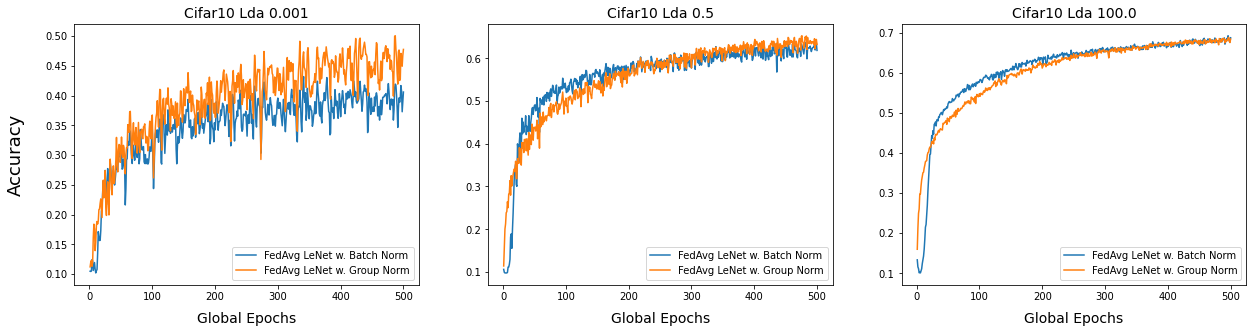

In [51]:
from visualisation.metric_extraction_tools import get_default_plot

fig, ax = plt.subplots(1, 3, figsize=(21, 6))

name_fun = lambda n: f"FedAvg LeNet w. Batch Norm" if "bn" in n.split("_") else f"FedAvg LeNet w." \
                                                                                f" Group Norm"

# fig.suptitle("FedAvg LeNet Batch- vs Group Normalisation")

plot_all_experiments_in_folder(checkpoints_dir / "Cifar10_Lda_0.001_LeNet_BN_GN", 1, ax=ax[0],
                               title="Cifar10 Lda 0.001",
                               format="-", win=2,
                               gen_name_from_subfolder_name=name_fun)

plot_all_experiments_in_folder(checkpoints_dir / "Cifar10_Lda_0.5_LeNet_BN_GN", 1, ax=ax[1],
                               title="Cifar10 Lda 0.5",
                               format="-", win=1,
                               gen_name_from_subfolder_name=name_fun)

plot_all_experiments_in_folder(checkpoints_dir / "Cifar10_Lda_100.0_LeNet_BN_GN", 1, ax=ax[2],
                               title="Cifar10 Lda 100.0",
                               format="-", win=1,
                               gen_name_from_subfolder_name=name_fun)
for axis in ax:
    axis.set_xlabel("Global Epochs", labelpad=10, fontdict={"size": 14})
ax[0].set_ylabel("Accuracy", labelpad=20, fontdict={"size": 18})
fig.savefig(bbox_inches="tight", fname="bn_gn_experiment.png")